In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data/peptide_files/AllQuantifiedPeptides_PXD019515.tsv', sep='\t')

In [3]:
df.head()

,Sequence,Base Sequence,Protein Groups,Gene Names,Organism,Intensity_FAIMS_2CV_OTIT_HCD_300ITMS2_Single_HeLa_1-calib,Intensity_FAIMS_2CV_OTIT_HCD_300ITMS2_Single_HeLa_2-calib,Intensity_FAIMS_2CV_OTIT_HCD_300ITMS2_Single_HeLa_3-calib,Intensity_FAIMS_2CV_OTIT_HCD_300ITMS2_SingleInterNeuron_1-calib,Intensity_FAIMS_2CV_OTIT_HCD_300ITMS2_SingleInterNeuron_2-calib,...,Detection Type_FAIMS_2CV_OTIT_HCD_300ITMS2_Single_HeLa_1-calib,Detection Type_FAIMS_2CV_OTIT_HCD_300ITMS2_Single_HeLa_2-calib,Detection Type_FAIMS_2CV_OTIT_HCD_300ITMS2_Single_HeLa_3-calib,Detection Type_FAIMS_2CV_OTIT_HCD_300ITMS2_SingleInterNeuron_1-calib,Detection Type_FAIMS_2CV_OTIT_HCD_300ITMS2_SingleInterNeuron_2-calib,Detection Type_FAIMS_2CV_OTIT_HCD_300ITMS2_SingleInterNeuron_3-calib,Detection Type_FAIMS_2CV_OTIT_HCD_300ITMS2_SingleMotorNeuron_1-calib,Detection Type_FAIMS_2CV_OTIT_HCD_300ITMS2_SingleMotorNeuron_2-calib,Detection Type_FAIMS_2CV_OTIT_HCD_300ITMS2_SingleMotorNeuron_3-calib,Unnamed: 23
0,AAAAAAALQAK,AAAAAAALQAK,P36578;UNDEFINED,RPL4;,Homo sapiens;,0.000000,43698.238593,57066.784200,24973.190857,20640.448907,...,NotDetected,MSMS,MSMS,MSMS,MSMS,MSMS,MSMS,MBR,MBR,NaN
1,AAAFEQLQK,AAAFEQLQK,UNDEFINED,NaN,NaN,0.000000,5856.438557,4469.723240,6651.124334,8987.733389,...,NotDetected,MBR,MBR,MSMS,MBR,MBR,MBR,MBR,MBR,NaN
2,AAALEAMK,AAALEAMK,UNDEFINED,NaN,NaN,0.000000,327.377997,6870.402591,322.959284,0.000000,...,NotDetected,MBR,MSMS,MBR,NotDetected,NotDetected,NotDetected,MBR,NotDetected,NaN
3,AAALEQFK,AAALEQFK,UNDEFINED,NaN,NaN,7788.284729,4104.277140,494.224468,5087.673630,4900.234884,...,MBR,MBR,MBR,MSMS,MBR,MBR,MBR,MBR,MBR,NaN
4,AAANEQLTR,AAANEQLTR,UNDEFINED,NaN,NaN,0.000000,4415.983741,0.000000,15984.223412,21682.843166,...,NotDetected,MSMS,NotDetected,MBR,MBR,MBR,MSMS,MBR,NotDetected,NaN


In [4]:
# we need to get the PGM1 protein and see if it's kind of looking the same. 

In [5]:
df_peptide_notshared = df[~df['Protein Groups'].str.contains(';')]
df_peptide_notshared 

df_peptide_shared = df[df['Protein Groups'].str.contains(';')]
df_peptide_shared

df_peptide_shared['gene_split'] = df_peptide_shared['Gene Names'].str.split(';')
# df_peptide_shared[['Gene Names', 'gene_split']]

#expand the rows. the concat onto other df
df2_pep_shared = df_peptide_shared.explode('gene_split').reset_index(drop=True)
df2_pep_shared['Gene Names'] = df2_pep_shared['Gene Names'].str.split(';').str[0]
df2_pep_shared = df2_pep_shared[df2_pep_shared['gene_split'] != ""] #without this line protein that have the format AAX; are added twice

df_combined = pd.concat([df_peptide_notshared, df2_pep_shared])
df_combined

/var/folders/zk/jc657sbs27l7_q82ygdlvxxc0000gp/T/ipykernel_39309/226859099.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peptide_shared['gene_split'] = df_peptide_shared['Gene Names'].str.split(';')


,Sequence,Base Sequence,Protein Groups,Gene Names,Organism,Intensity_FAIMS_2CV_OTIT_HCD_300ITMS2_Single_HeLa_1-calib,Intensity_FAIMS_2CV_OTIT_HCD_300ITMS2_Single_HeLa_2-calib,Intensity_FAIMS_2CV_OTIT_HCD_300ITMS2_Single_HeLa_3-calib,Intensity_FAIMS_2CV_OTIT_HCD_300ITMS2_SingleInterNeuron_1-calib,Intensity_FAIMS_2CV_OTIT_HCD_300ITMS2_SingleInterNeuron_2-calib,...,Detection Type_FAIMS_2CV_OTIT_HCD_300ITMS2_Single_HeLa_2-calib,Detection Type_FAIMS_2CV_OTIT_HCD_300ITMS2_Single_HeLa_3-calib,Detection Type_FAIMS_2CV_OTIT_HCD_300ITMS2_SingleInterNeuron_1-calib,Detection Type_FAIMS_2CV_OTIT_HCD_300ITMS2_SingleInterNeuron_2-calib,Detection Type_FAIMS_2CV_OTIT_HCD_300ITMS2_SingleInterNeuron_3-calib,Detection Type_FAIMS_2CV_OTIT_HCD_300ITMS2_SingleMotorNeuron_1-calib,Detection Type_FAIMS_2CV_OTIT_HCD_300ITMS2_SingleMotorNeuron_2-calib,Detection Type_FAIMS_2CV_OTIT_HCD_300ITMS2_SingleMotorNeuron_3-calib,Unnamed: 23,gene_split
1,AAAFEQLQK,AAAFEQLQK,UNDEFINED,NaN,NaN,0.000000,5856.438557,4469.723240,6651.124334,8987.733389,...,MBR,MBR,MSMS,MBR,MBR,MBR,MBR,MBR,NaN,NaN
2,AAALEAMK,AAALEAMK,UNDEFINED,NaN,NaN,0.000000,327.377997,6870.402591,322.959284,0.000000,...,MBR,MSMS,MBR,NotDetected,NotDetected,NotDetected,MBR,NotDetected,NaN,NaN
3,AAALEQFK,AAALEQFK,UNDEFINED,NaN,NaN,7788.284729,4104.277140,494.224468,5087.673630,4900.234884,...,MBR,MBR,MSMS,MBR,MBR,MBR,MBR,MBR,NaN,NaN
4,AAANEQLTR,AAANEQLTR,UNDEFINED,NaN,NaN,0.000000,4415.983741,0.000000,15984.223412,21682.843166,...,MSMS,NotDetected,MBR,MBR,MBR,MSMS,MBR,NotDetected,NaN,NaN
5,AAASTDYYK,AAASTDYYK,UNDEFINED,NaN,NaN,0.000000,606.917323,0.000000,9123.066771,10181.484897,...,MBR,NotDetected,MSMS,MBR,MBR,MBR,MBR,NotDetected,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1901,YSSLAEAASK,YSSLAEAASK,P00915;UNDEFINED,CA1,Homo sapiens;,0.000000,0.000000,0.000000,4266.572659,5235.189438,...,NotDetected,NotDetected,MBR,MBR,MSMS,MBR,MBR,MBR,NaN,CA1
1903,YSTDVSVDEVK,YSTDVSVDEVK,P00367;UNDEFINED,GLUD1,Homo sapiens;,5120.242432,2805.870184,3364.844981,103426.635340,44508.012035,...,MBR,MBR,MSMS,MBR,MSMS,MSMS,MBR,MSMS,NaN,GLUD1
1905,YSVDIPLDK,YSVDIPLDK,P61353;UNDEFINED,RPL27,Homo sapiens;,0.000000,56716.060277,736.220627,47179.016244,62538.855036,...,MBR,MBR,MBR,MBR,MBR,MBR,MSMS,MBR,NaN,RPL27
1907,YYITIIDAPGHR,YYITIIDAPGHR,Q05639;UNDEFINED,EEF1A2,Homo sapiens;,0.000000,412.135926,1438.200288,38879.176838,96414.107326,...,MBR,MBR,MSMS,MSMS,MSMS,MSMS,MSMS,MSMS,NaN,EEF1A2


In [6]:
df_combined.columns

Index(['Sequence', 'Base Sequence', 'Protein Groups', 'Gene Names', 'Organism',
       'Intensity_FAIMS_2CV_OTIT_HCD_300ITMS2_Single_HeLa_1-calib',
       'Intensity_FAIMS_2CV_OTIT_HCD_300ITMS2_Single_HeLa_2-calib',
       'Intensity_FAIMS_2CV_OTIT_HCD_300ITMS2_Single_HeLa_3-calib',
       'Intensity_FAIMS_2CV_OTIT_HCD_300ITMS2_SingleInterNeuron_1-calib',
       'Intensity_FAIMS_2CV_OTIT_HCD_300ITMS2_SingleInterNeuron_2-calib',
       'Intensity_FAIMS_2CV_OTIT_HCD_300ITMS2_SingleInterNeuron_3-calib',
       'Intensity_FAIMS_2CV_OTIT_HCD_300ITMS2_SingleMotorNeuron_1-calib',
       'Intensity_FAIMS_2CV_OTIT_HCD_300ITMS2_SingleMotorNeuron_2-calib',
       'Intensity_FAIMS_2CV_OTIT_HCD_300ITMS2_SingleMotorNeuron_3-calib',
       'Detection Type_FAIMS_2CV_OTIT_HCD_300ITMS2_Single_HeLa_1-calib',
       'Detection Type_FAIMS_2CV_OTIT_HCD_300ITMS2_Single_HeLa_2-calib',
       'Detection Type_FAIMS_2CV_OTIT_HCD_300ITMS2_Single_HeLa_3-calib',
       'Detection Type_FAIMS_2CV_OTIT_HCD_300ITMS2_Si

In [7]:
#how many proteins are there total?
df_combined = df_combined[['Gene Names','Sequence',
        'Intensity_FAIMS_2CV_OTIT_HCD_300ITMS2_Single_HeLa_1-calib',
       'Intensity_FAIMS_2CV_OTIT_HCD_300ITMS2_Single_HeLa_2-calib',
       'Intensity_FAIMS_2CV_OTIT_HCD_300ITMS2_Single_HeLa_3-calib'
   ]]


In [8]:
#Calculates the total spectral count for each row. Will help to find examples
def calc_totals(row):
    total = 0
    if row[2] != 0:
        total += 1
    if row[3] != 0:
        total += 1
    if row[4] != 0:
        total += 1

    return total


df_with_totals = df_combined.copy()
df_with_totals['Total_Count'] = df_with_totals.apply(calc_totals, axis = 1)
df_with_totals = df_with_totals[~df_with_totals['Gene Names'].isnull()]


In [9]:
df_with_totals

,Gene Names,Sequence,Intensity_FAIMS_2CV_OTIT_HCD_300ITMS2_Single_HeLa_1-calib,Intensity_FAIMS_2CV_OTIT_HCD_300ITMS2_Single_HeLa_2-calib,Intensity_FAIMS_2CV_OTIT_HCD_300ITMS2_Single_HeLa_3-calib,Total_Count
10,PRKRA,AAEAAINILK,0.000000,0.000000,0.000000,0
12,PHB,AAELIANSLATAGDGLIELR,3495.783480,4008.634299,0.000000,2
22,PLEC,AALAHSEEVTASQVAATK,18571.506836,13507.765120,26723.122854,3
26,CYC1,AANNGALPPDLSYIVR,261.157852,1406.749838,2997.077823,3
29,TBCD,AASAAFQENVGR,2289.029065,475.205902,527.355967,3
...,...,...,...,...,...,...
1901,CA1,YSSLAEAASK,0.000000,0.000000,0.000000,0
1903,GLUD1,YSTDVSVDEVK,5120.242432,2805.870184,3364.844981,3
1905,RPL27,YSVDIPLDK,0.000000,56716.060277,736.220627,2
1907,EEF1A2,YYITIIDAPGHR,0.000000,412.135926,1438.200288,2


In [10]:
df_gene_ind = df_with_totals.set_index(['Gene Names', 'Sequence']) #create a multiindex dataframe
df_gene_ind = df_gene_ind[df_gene_ind['Total_Count']>0]#drop rows that don't have any intensities in any col. Who knows why that's a thing
df_gene_ind.sort_index()



Intensity_FAIMS_2CV_OTIT_HCD_300ITMS2_Single_HeLa_1-calib  \
Gene Names Sequence                                                                         
AARS1      IVAVTGAEAQK                                                   0.000000           
ABHD12     VQFVPFHSDLGYR                                              1428.785834           
ABHD16A    YQGPVLLIR                                                  1236.899547           
ACADVL     AGLGSGLSLSGLVHPELSR                                           0.000000           
           IFEGTNDILR                                                    0.000000           
...                                                                           ...           
YWHAZ      KGIVDQSQQAYQEAFEISK                                       97341.028971           
           SVTEQGAELSNEER                                                0.000000           
           TAFDEAIAELDTLSEESYK                                           0.000000           
           YLAEVAAGDDK                                                   0.000000           
ZNRD2      EHQLASASELPLGSR                                            6638.876444           

                                Intensity_FAIMS_2CV_OTIT_HCD_300ITMS2_Single_HeLa_2-calib  \
Gene Names Sequence                                                                         
AARS1      IVAVTGAEAQK                                                4642.521384           
ABHD12     VQFVPFHSDLGYR                                               808.592901           
ABHD16A    YQGPVLLIR                                                     0.000000           
ACADVL     AGLGSGLSLSGLVHPELSR                                        2433.443358           
           IFEGTNDILR                                                  678.297735           
...                                                                           ...           
YWHAZ      KGIVDQSQQAYQEAFEISK                                       29207.897564           
           SVTEQGAELSNEER                                            16628.736238           
           TAFDEAIAELDTLSEESYK                                       26472.606169           
           YLAEVAAGDDK                                               35709.166140           
ZNRD2      EHQLASASELPLGSR                                            2866.756774           

                                Intensity_FAIMS_2CV_OTIT_HCD_300ITMS2_Single_HeLa_3-calib  \
Gene Names Sequence                                                                         
AARS1      IVAVTGAEAQK                                                3648.850695           
ABHD12     VQFVPFHSDLGYR                                               263.286020           
ABHD16A    YQGPVLLIR                                                     0.000000           
ACADVL     AGLGSGLSLSGLVHPELSR                                        4580.290386           
           IFEGTNDILR                                                 6140.178420           
...                                                                           ...           
YWHAZ      KGIVDQSQQAYQEAFEISK                                       47318.860118           
           SVTEQGAELSNEER                                             5871.331735           
           TAFDEAIAELDTLSEESYK                                       21049.676271           
           YLAEVAAGDDK                                               22973.699098           
ZNRD2      EHQLASASELPLGSR                                             590.110366           

                                Total_Count  
Gene Names Sequence                          
AARS1      IVAVTGAEAQK                    2  
ABHD12     VQFVPFHSDLGYR                  3  
ABHD16A    YQGPVLLIR                      1  
ACADVL     AGLGSGLSLSGLVHPELSR            2  
           IFEGTNDILR                     2  
...                                     ...  
YWHAZ      KGIVDQSQQAYQEAFEISK    

In [11]:
len(list(df_gene_ind.index.get_level_values('Gene Names').unique()))

625

In [12]:
len(list(df_gene_ind.index.get_level_values('Sequence')))

1563

In [13]:
no_consistent= []
one_consistent = []
two_consistent = []
three_consistent = []
fourplus_consistent = []

num_proteins = 0

for gene, gene_df in df_gene_ind.groupby(level=0):
    num_proteins+=1
    #loop through each gene and count the number of consistent peptides
    if len(gene_df[gene_df['Total_Count'] == 3]) == 0:
        no_consistent.append(gene)
    elif len(gene_df[gene_df['Total_Count'] == 3]) == 1:
        one_consistent.append(gene)
    elif len(gene_df[gene_df['Total_Count'] == 3]) == 2:
#         import pdb; pdb.set_trace()
        two_consistent.append(gene)
    elif len(gene_df[gene_df['Total_Count'] == 3]) == 3:
        three_consistent.append(gene)
    elif len(gene_df[gene_df['Total_Count'] == 3]) >= 4:
        fourplus_consistent.append(gene)
        
    else:
        print('something is wrong')



In [14]:
len(fourplus_consistent)

45

In [15]:
len(three_consistent)

31

In [16]:
num_proteins

625

In [17]:
'''
returns a dictionary where the key is the number of peptides, 
and the value is the number of proteins
Example: 5:4 would mean that 4 proteins consist of 5 peptides
'''
def get_num_pep_dict(df_with_totals, pep_consistency_list):
    subdf = df_with_totals[df_with_totals['Gene Names'].isin(pep_consistency_list)]
    subdf = subdf.set_index(['Gene Names', 'Sequence']) #create a multiindex dataframe
    subdf = subdf[subdf['Total_Count']>0]#drop rows that don't have any intensities in any col. Who knows why that's a thing
    subdf = subdf.sort_index()
    
    
    num_pep_consis = {}
    for gene, gene_df in subdf.groupby(level=0):
        num_peptides = len(gene_df)
        if num_peptides not in num_pep_consis.keys():    
            num_pep_consis[num_peptides] = 1
        else:
            num_pep_consis[num_peptides] += 1

    return num_pep_consis    

In [18]:
no_consis_d = get_num_pep_dict(df_with_totals, no_consistent)
one_consis_d = get_num_pep_dict(df_with_totals, one_consistent)
two_consis_d = get_num_pep_dict(df_with_totals, two_consistent)
three_consis_d = get_num_pep_dict(df_with_totals, three_consistent)
fourplus_consis_d = get_num_pep_dict(df_with_totals, fourplus_consistent)


In [19]:
no_consis_d

{1: 180, 2: 34, 3: 9, 4: 5, 5: 1}

## make figure

In [20]:
num_pep_0consis_series = pd.Series(no_consis_d)
num_pep_1consis_series = pd.Series(one_consis_d)
num_pep_2consis_series = pd.Series(two_consis_d)
num_pep_3consis_series = pd.Series(three_consis_d)
num_pep_4plusconsis_series = pd.Series(fourplus_consis_d)

In [21]:
plotdf = pd.concat([num_pep_0consis_series,
           num_pep_1consis_series,
          num_pep_2consis_series,
          num_pep_3consis_series,
          num_pep_4plusconsis_series],axis=1)


plotdf.rename({0:'0',
              1:'1',
              2:'2',
              3:'3',
              4:'4'}, axis=1, inplace=True)

plotdf = plotdf.sort_index()

In [22]:
plotdf.head() #index is the number of peptides in a protein. Values are the number of proteins

,0,1,2,3,4
1,180.0,163.0,NaN,NaN,NaN
2,34.0,44.0,34.0,NaN,NaN
3,9.0,23.0,20.0,14.0,NaN
4,5.0,6.0,16.0,4.0,3.0
5,1.0,3.0,8.0,4.0,3.0


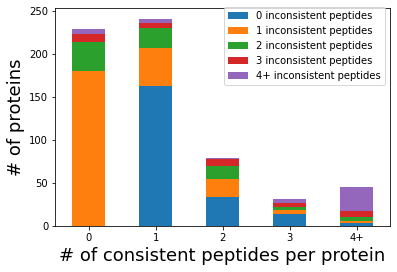

In [23]:
plotdf = plotdf.reset_index()

melted = pd.melt(plotdf, id_vars='index', value_vars=plotdf.columns.tolist())
melted.rename({'variable':'category', 'index':'total_peptides', 'value':'num_proteins'}, axis=1, inplace=True)
melted = melted[melted['num_proteins'].notnull()]
melted.head()

# make a boxplot
#each row is a protein
#y axis is the number of inconsistent
#x axis is the category

plot4 = melted.copy()
plot4



def get_inconsistent_count(row):
    num_consistent = int(row['category'].split(' ')[0])        
    num_total = row['total_peptides']
    if num_consistent == num_total:
        return 0
    else:
        num_inconsistent  = num_total - num_consistent
        return num_inconsistent
    
plot4 = melted.copy()
plot4['inconsistent_count'] = plot4.apply(get_inconsistent_count, axis=1)
plot4 = plot4.sort_values('category')
plot4.replace('4 consistent peptide', '4+ consistent peptide', inplace=True)
plot4.replace('4', '4+', inplace=True)


plot4.drop(columns='total_peptides', inplace=True)

plot4 = plot4.groupby(['category', 'inconsistent_count'])['num_proteins'].sum().unstack().fillna(0)

#format to deal with 4+
above4 = list(plot4.columns)
above4 = [x for x in above4 if x >= 4]
plot4['4+'] = plot4[above4].sum(axis=1)
plot4.drop(columns=above4, axis=1,inplace=True)

plot4 = plot4.rename({0:'0 inconsistent peptides',
             1:'1 inconsistent peptides',
             2:'2 inconsistent peptides',
             3:'3 inconsistent peptides',
             '4+':'4+ inconsistent peptides'}, axis=1)
plot4


from matplotlib import pyplot as plt

# Very simple one-liner using our agg_tips DataFrame.
ax = plot4.plot(kind='bar', stacked=True)

plt.xticks(rotation=0, ha='center')

ax.legend(bbox_to_anchor=(1., 1.03))

plt.xlabel('# of consistent peptides per protein', fontsize=18)
plt.ylabel('# of proteins', fontsize=18)
plt.savefig('stacked_bar_chart.png', dpi=600, bbox_inches = "tight")

plt.show()

In [24]:
plotdf.sum()

index    280.0
0        229.0
1        241.0
2         79.0
3         31.0
4         45.0
dtype: float64

In [25]:
num_prot = len(list(df_gene_ind.index.get_level_values('Gene Names').unique()))

In [26]:
num_prot

625

In [27]:
print('0 consistent: ' + str(round(229/num_prot*100, 2)))
print('1 consistent: ' + str(round(241/num_prot*100, 2)))
print('2 consistent: ' + str(round(79/num_prot*100,2)))
print('3 consistent: ' + str(round(31/num_prot*100,2)))
print('4+ consistent: ' + str(round(45/num_prot*100,2)))

0 consistent: 36.64
1 consistent: 38.56
2 consistent: 12.64
3 consistent: 4.96
4+ consistent: 7.2
